# Analysys

In [1]:
%matplotlib inline

In [2]:
from drl import logging
from drl.experiment.analyser import Analyzer
from drl.experiment.config import Config
from drl.experiment.experiment import Experiment
from drl.experiment.explorer import Explorer
from drl.logging import init_logging, set_logging_level, transform_verbose_count_to_logging_level
import logging
import logging.config

In [3]:
init_logging(logging.ERROR)

In [4]:
config = Config()
environment = Experiment(config)
analyzer = Analyzer(config, environment.get_session_id())

## Algoritms

In [5]:
experiments_alg = [
    '_experiments/train/banana-20200804T0810', # dqn     - eps 0.995 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200808T1313', # double  - eps 0.995 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200807T1756', # dueling - eps 0.995 - hidden_layers 64,64   - num_frames 1
]

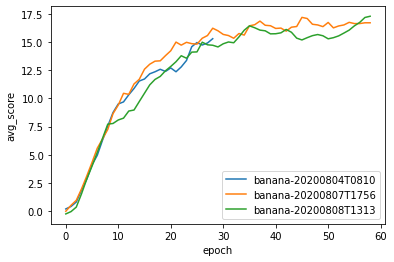

In [6]:
analyzer.compare_train_epoch_cols(experiments_alg, 'avg_score', True)

Observation:
* Both Dueling and Double network perform better than vanilla DQN. There was no significant difference between the Dueling and the Double  Q network.

## Epsilon

In [7]:
experiments_eps = [
    '_experiments/train/banana-20200808T0722', # double  - eps 0.997 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200808T1137', # double  - eps 0.996 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200808T1313', # double  - eps 0.995 - hidden_layers 64,64   - num_frames 1
]

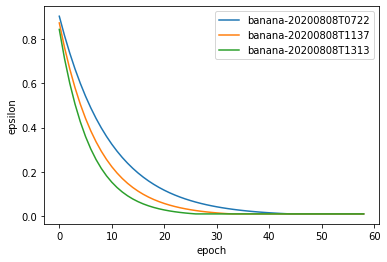

In [8]:
analyzer.compare_train_epoch_cols(experiments_eps, 'epsilon', True)

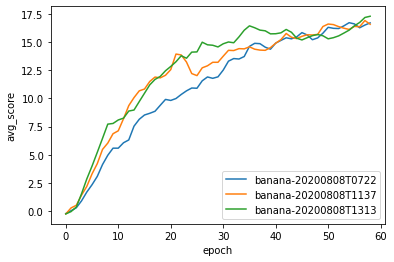

In [9]:
analyzer.compare_train_epoch_cols(experiments_eps, 'avg_score', True)

Obersvation:
* Less exploration (eps 0.98 vs. 0.95) didn't result in faster convergence of the optimization.

## Networks

In [10]:
experiments = [
    '_experiments/train/banana-20200804T0902', # dueling - eps 0.995 - hidden_layers 64,64   - num_frames 1 
    '_experiments/train/banana-20200808T1313', # double  - eps 0.995 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200808T1628', # double  - eps 0.995 - hidden_layers 128:128 - num_frames 1
    '_experiments/train/banana-20200809T0757', # dueling - eps 0.995 - hidden_layers 128:128 - num_frames 1
]

analyzer.compare_train_epoch_cols(experiments, 'avg_score', False)

'_experiments/analysis/lunarlander-20200816T1133/avg_score.png'

Observation:
* Using more neurons (64 vs. 128) in fully connected layers didn't increase the speed of convergence. After 2000 episodes, simpler networks achieved better scores (+1).

## Frames

'_experiments/analysis/lunarlander-20200816T1133/avg_score.png'

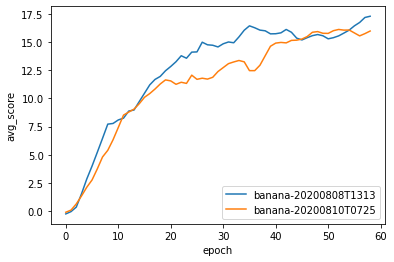

In [11]:
experiments = [
    '_experiments/train/banana-20200808T1313', # double  - eps 0.995 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200810T0725', # double  - eps 0.995 - hidden_layers 64,64   - num_frames 4
]

analyzer.compare_train_epoch_cols(experiments, 'avg_score', False)

Observation:
* Using more frames (1 vs. 4) didn't improve the speed of convergence or and result of the agent.

# Configuration

'_experiments/analysis/lunarlander-20200816T1133/beta.png'

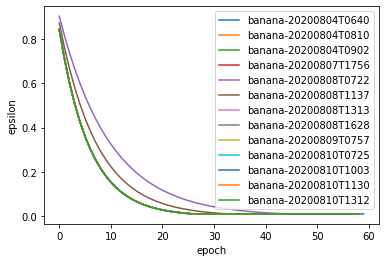

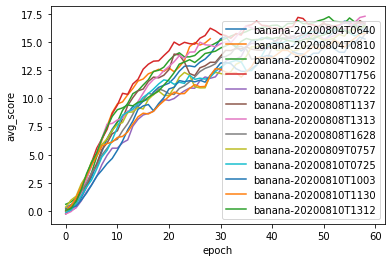

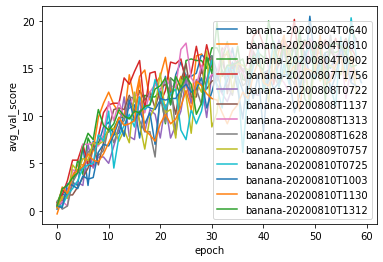

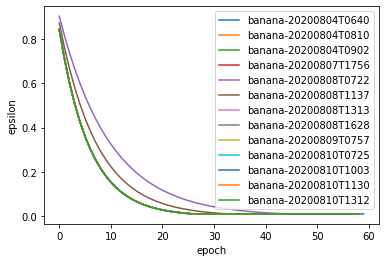

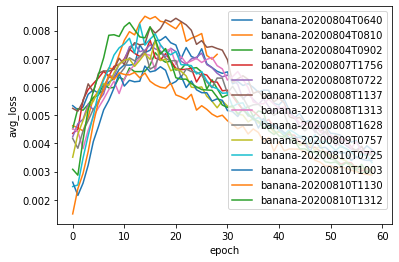

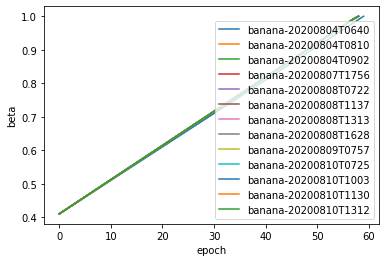

In [12]:
experiments = [
    '_experiments/train/banana-20200804T0640', # double  - eps 0.995 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200804T0810', # dqn     - eps 0.995 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200804T0902', # dueling - eps 0.995 - hidden_layers 64,64   - num_frames 1 
    '_experiments/train/banana-20200807T1756', # dueling - eps 0.995 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200808T0722', # double  - eps 0.997 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200808T1137', # double  - eps 0.996 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200808T1313', # double  - eps 0.995 - hidden_layers 64,64   - num_frames 1
    '_experiments/train/banana-20200808T1628', # double  - eps 0.995 - hidden_layers 128:128 - num_frames 1
    '_experiments/train/banana-20200809T0757', # dueling - eps 0.995 - hidden_layers 128:128 - num_frames 1
    '_experiments/train/banana-20200810T0725', # double  - eps 0.995 - hidden_layers 64,64   - num_frames 4
    '_experiments/train/banana-20200810T1003', # double  - eps 0.995 - hidden_layers 128,128 - num_frames 4
    '_experiments/train/banana-20200810T1130', # dueling - eps 0.995 - hidden_layers 128,128 - num_frames 4
    '_experiments/train/banana-20200810T1312', # dueling - eps 0.995 - hidden_layers 64,64   - num_frames 4
]

analyzer.compare_train_epoch_cols(experiments, 'epsilon', False)
analyzer.compare_train_epoch_cols(experiments, 'avg_score', False)
analyzer.compare_train_epoch_cols(experiments, 'avg_val_score', False)
analyzer.compare_train_epoch_cols(experiments, 'epsilon', False)
analyzer.compare_train_epoch_cols(experiments, 'avg_loss', False)
analyzer.compare_train_epoch_cols(experiments, 'beta', False)

In [13]:
analyzer.compare_train_config(experiments)

_experiments/train/banana-20200804T0640
{
    "configuration": {
        "agent": {
            "action_size": 4,
            "discrete": true,
            "num_frames": 1,
            "start_game_action": 0,
            "start_game_action_required": false,
            "state_offset": 0,
            "state_rgb": false,
            "state_size": 37
        },
        "env": {
            "is_atari": false,
            "terminate_reward": 0,
            "type": "unity"
        },
        "id": "banana",
        "train": {
            "epsilon": 0.995,
            "eval_frequency": 10000,
            "eval_steps": 2000,
            "gamma": 0.99,
            "human_flag": false,
            "learning_rate": 0.0001,
            "max_episode_steps": 1000,
            "max_steps": 600000,
            "neural_network": [
                64,
                64
            ],
            "tau": 0.001
        }
    },
    "model": null,
    "session_id": "banana-20200804T0640"
}
_experiments/tra